### EX03 - Run on real hardware

Take the program from exercise 3, and modify it to run your circuit on a real quantum
computer.

Using backend ibm_brisbane
        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
{'quantum_seconds': 2.117936785737959}


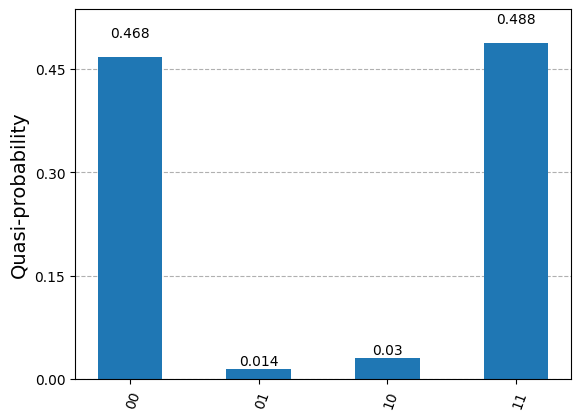

In [1]:
from qiskit.circuit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit import transpile
import os
from dotenv import load_dotenv

import os

load_dotenv()
TOKEN = os.getenv('IBMQ_TOKEN')

service = QiskitRuntimeService(channel="ibm_quantum", token=TOKEN)
backend = service.least_busy(operational=True, simulator=False)
print("Using backend", backend.name)


nbShots = 500
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
print(qc)


transpiled_qc = transpile(qc, backend=backend)

sampler = Sampler(backend)

job = sampler.run([transpiled_qc], shots=nbShots)
job.status()
print(job.usage_estimation)

result = job.result()
meas_data = result[0].data.meas
counts = meas_data.get_counts()
render = {key: value / nbShots for key, value in counts.items()}

plot_histogram(render)


